# Naive Bayes Gaussiano #


## Introducción al tema ##

Si bien el clasificador de naive bayes ya visto resulta útil para el caso datos discretos, como el caso de la moneda o el clasificador de articulos, no funciona con datos continuos por lo que es necesario buscar una solución.
Asumiendo que los valores tienen una distribución gaussiana, se separan los datos en las clases que se quieren diferenciar y se obtienen las medias y varianzas de cada clase. 
Si se tiene una observación $v$ que se quiere clasificar, se procede a calcular de con cual de las $k$ distribuciones es más probable que la observación haya sido generada.

\begin{align}
p(x=v|C_k) & = \frac{1}{\sqrt{2\pi\sigma_k^2}}e^{-\frac{(v-\mu_k)²}{2\sigma_k^2}}
\end{align}

### Ejemplo ###
Supongamos que se tienen mediciones sobre el peso de perros y gatos y se quiere realizar un clasificador de naive bayes gaussiano para clasificar nuevas mediciones.

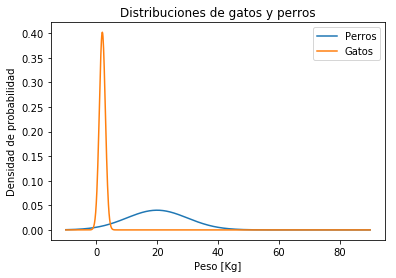

Cantidad de perros clasificados como gatos de una cantidad de 10000 perros: 427


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as normal
N = 10000 # cantidad de datos 
dogs = np.random.normal(20,10,N)
cats = np.random.normal(2,1,N)


mean_dogs = np.mean(dogs)
var_dogs = np.var(dogs)
mean_cats = np.mean(cats)
var_cats = np.var(cats)

#Plot
x = np.arange(1000) * 0.1 -10
plt.figure()
plt.plot(x,normal.pdf(x,mean_dogs,var_dogs),label='Perros')
plt.plot(x,normal.pdf(x,mean_cats,var_cats),label='Gatos')
plt.legend(loc='upper right')
plt.title('Distribuciones de gatos y perros')
plt.xlabel('Peso [Kg]')
plt.ylabel('Densidad de probabilidad')
plt.show()

#Clasificar perros
errores = 0
for i in range(0,len(dogs)):
    if normal.pdf(dogs[i],mean_dogs,var_dogs) < normal.pdf(dogs[i],mean_cats,var_cats):
        errores += 1

print('Cantidad de perros clasificados como gatos de una cantidad de',N,'perros:',errores)



## Consigna ##

Realizar un clasificador bayesiano ingenuo gaussiano para clasificar el dataset de iris.

### Sobre el dataset

El dataset de Iris se trata de un conjunto de mediciones de 150 flores, provenientes de 3 especies de flores diferentes (50 flores de cada una). Las mediciones se realizaron sobre el ancho y alto del sépalo y pétalo.
Se busca clasificar las mediciones en las 3 clases a partir de las mediciones de los rasgos y dada su relativa simpleza se convirtió en un problema típico de clasificadores en machine learning.

Los datos usados están provistos por la cátedra y se muestra como cargarlos a continuación

## Load data ##

In [13]:
import numpy as np

iris_data = np.load('train_data.npy')
iris_target = np.load('train_target.npy')
#las mediciones se encuentran en iris.data
print('Primer dato',iris_data[0])     #por ejemplo el primer dato
print('Largo del sépalo',iris_data[0,0],'Ancho del sépalo',iris_data[0,1],'Largo del pétalo',iris_data[0,2],'Ancho del pétalo',iris_data[0,3])  #Primer dato accediendo a cada una de sus partes
#las clases se encuentran en iris.target
print('Clase del primer dato',iris_target[0]) #clase del primer dato
N  = len(iris_data) #largo del dataset
print('Largo del dataset',N)

Primer dato [ 5.1  3.5  1.4  0.2]
Largo del sépalo 5.1 Ancho del sépalo 3.5 Largo del pétalo 1.4 Ancho del pétalo 0.2
Clase del primer dato 0.0
Largo del dataset 120


## Ejemplo de visualización de datos con matplotlib ##

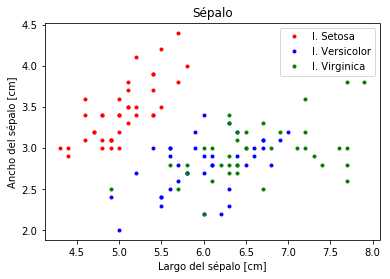

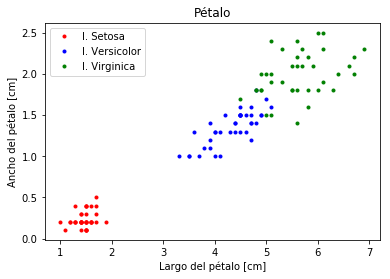

In [14]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(iris_data[0:39,0],iris_data[0:39,1],'.',color='r',label='I. Setosa')
plt.plot(iris_data[40:79,0],iris_data[40:79,1],'.',color='b',label='I. Versicolor')
plt.plot(iris_data[80:119,0],iris_data[80:119,1],'.',color='g',label='I. Virginica')
plt.title('Sépalo')
plt.ylabel('Ancho del sépalo [cm]')
plt.xlabel('Largo del sépalo [cm]')
plt.legend(loc='upper right')

plt.figure()
plt.title('Pétalo')
plt.plot(iris_data[0:39,2],iris_data[0:39,3],'.',color='r',label='I. Setosa')
plt.plot(iris_data[40:79,2],iris_data[40:79,3],'.',color='b',label='I. Versicolor')
plt.plot(iris_data[80:119,2],iris_data[80:119,3],'.',color='g',label='I. Virginica')
plt.ylabel('Ancho del pétalo [cm]')
plt.xlabel('Largo del pétalo [cm]')
plt.legend(loc='upper left')

plt.show()

## Solución  ##